In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ["SerialNo.","GREScore","TOEFLScore","UniversityGrade","Compensacion","LOR","CGPA","Research","Posibility"]
# load dataset
pima = pd.read_csv("Admission_Predict_Ver1.1.csv", header=None, names=col_names)

In [3]:
pima.head()

,SerialNo.,GREScore,TOEFLScore,UniversityGrade,Compensacion,LOR,CGPA,Research,Posibility
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#split dataset in features and target variable
feature_cols =  ["CGPA"]
target="Posibility"
X = pima[feature_cols] # Features
y = pima[target]# Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [6]:
clf = DecisionTreeRegressor()

In [7]:
clf = clf.fit(X_train,y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

In [10]:
dot_data = StringIO()
with open("admission.dot", "w") as dotfile:
    export_graphviz(clf, out_file=dotfile,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_cols,class_names=['0','1'])
    dotfile.close()

In [11]:
from graphviz import Source

In [12]:
diccionario = {
    "Prediccion":list(y_pred), 
    "Real":list(y_test)
}

In [13]:
data = pd.DataFrame(diccionario)
data.head(10)

,Prediccion,Real
0,0.715000,0.62
1,0.685000,0.75
2,0.930000,0.89
3,0.755000,0.57
4,0.813333,0.79
5,0.707500,0.70
6,0.750000,0.76
7,0.573333,0.74
8,0.820000,0.77
9,0.710000,0.64


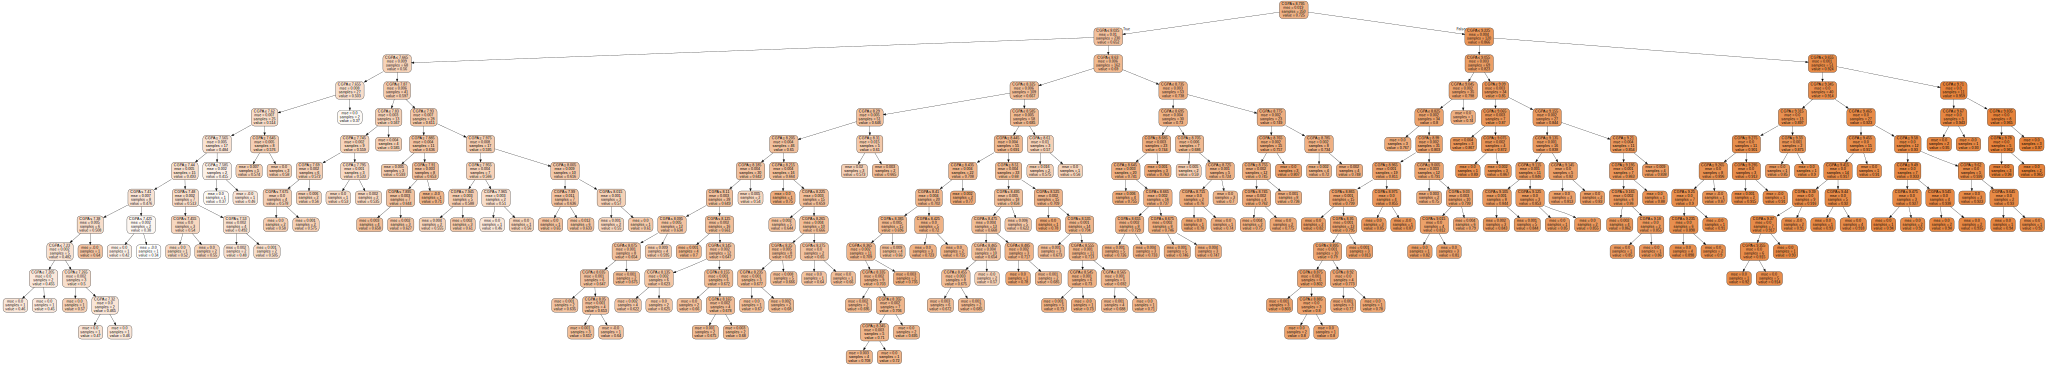

In [14]:
file = open("admission.dot", "r")
text = file.read()
Source(text)

In [15]:
clf.feature_importances_

array([1.])